<a href="https://colab.research.google.com/github/erikohara/tcc_eniac/blob/main/MachineLearningMultipleIntelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando perfis dos indivíduos do estudo

In [2]:
import pandas as pd

In [6]:
url_participants = "https://raw.githubusercontent.com/erikohara/tcc_eniac/main/db_a/participants.tsv"
df_participants = pd.read_csv(url_participants, delimiter="\t")

### Retirando colunas que não serão utilizadas e dados de diferentes momentos medidos

In [8]:
df_participants.participant_id = "a-" + df_participants.participant_id
df_participants.drop(columns="task",inplace=True)
df_participants.drop(columns="condition",inplace=True)
df_participants.drop(columns="comprehension",inplace=True)
df_participants.age = df_participants.age.str.split(",")
df_participants.age = df_participants.age.str[0]
df_participants.sex = df_participants.sex.str.split(",")
df_participants.sex = df_participants.sex.str[0]

In [9]:
df_participants

,participant_id,age,sex
0,a-sub-001,22,F
1,a-sub-002,20,M
2,a-sub-003,-1,F
3,a-sub-004,24,M
4,a-sub-005,-1,M
...,...,...,...
340,a-sub-341,21,M
341,a-sub-342,23,M
342,a-sub-343,18,F
343,a-sub-344,18,F


### Gráficos da Idade e do Sexo dos indivíduos do estudo

In [10]:
import matplotlib.pyplot as plt

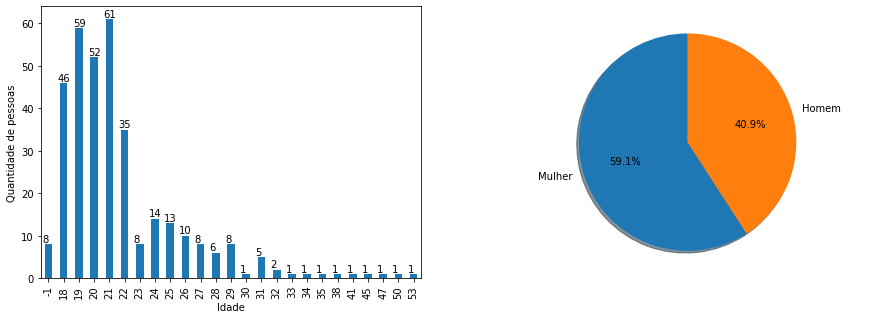

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
df_age = df_participants.groupby(['age']).size()
df_age.plot(kind='bar', ax=ax1)
ax1.set_xlabel("Idade")
ax1.set_ylabel("Quantidade de pessoas")
for index, value in enumerate(df_age):
  ax1.text(index-0.4, value +0.5, str(value))
sums = df_participants.groupby(['sex']).size()
ax2.axis('equal');
ax2.pie(sums, labels=['Mulher','Homem'],autopct='%1.1f%%',shadow=True, startangle=90);
plt.show()

# Importando os dados de segmentação e parcelamento[texto do link](https://)

### Importando segmentação e retirando colunas com informações que são somatórios de outas

In [15]:
url_seg = "https://raw.githubusercontent.com/erikohara/tcc_eniac/main/db_a/aseg_stats.txt"
df_seg = pd.read_csv(url_seg, delimiter="\t")
df_seg.drop(columns=[
                     "Left-WM-hypointensities", "Right-WM-hypointensities", "non-WM-hypointensities",
                     "Left-non-WM-hypointensities", "Right-non-WM-hypointensities", "BrainSegVol",
                     "BrainSegVolNotVent", "lhCortexVol", "rhCortexVol", "CortexVol",	"lhCerebralWhiteMatterVol",	
                     "rhCerebralWhiteMatterVol", "CerebralWhiteMatterVol",	"SubCortGrayVol",	"TotalGrayVol",	"SupraTentorialVol",
                     "SupraTentorialVolNotVent",	"MaskVol",	"BrainSegVol-to-eTIV",	"MaskVol-to-eTIV",
                     "lhSurfaceHoles",	"rhSurfaceHoles",	"SurfaceHoles",	"EstimatedTotalIntraCranialVol"
                     ],inplace=True)
df_seg

,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,Brain-Stem,Left-Hippocampus,Left-Amygdala,CSF,Left-Accumbens-area,Left-VentralDC,Left-vessel,Left-choroid-plexus,Right-Lateral-Ventricle,Right-Inf-Lat-Vent,Right-Cerebellum-White-Matter,Right-Cerebellum-Cortex,Right-Thalamus,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC,Right-vessel,Right-choroid-plexus,5th-Ventricle,WM-hypointensities,Optic-Chiasm,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior
0,a-sub-001,4023.1,479.9,16525.4,55296.9,7521.8,3040.7,4697.5,1792.4,638.5,1316.3,19891.7,3807.4,1609.4,763.2,442.4,4043.9,38.8,398.7,3626.6,403.3,13786.9,57146.2,7155.2,3092.6,4745.9,1863.9,3910.7,1679.1,529.7,4027.7,15.1,480.2,0.0,1001.6,73.9,835.7,526.9,533.0,440.1,644.4
1,a-sub-002,17870.6,781.8,17953.2,63488.4,9572.1,5129.2,6460.2,2730.3,1732.0,2583.2,22684.6,4968.4,2187.9,1430.7,881.8,4958.1,84.9,544.7,11221.9,557.1,16728.1,67784.5,9430.6,5252.7,6587.2,2612.7,4958.3,2515.2,818.5,4979.0,59.9,1018.8,0.0,1349.4,247.1,968.8,442.9,412.3,499.5,907.9
2,a-sub-003,5790.8,237.5,14219.7,56257.6,9045.1,4399.6,5790.4,2266.8,832.5,1832.4,20247.4,4843.5,1972.4,956.9,746.2,4255.2,61.2,315.1,4992.7,251.2,13634.2,56934.2,9563.1,4606.6,5794.1,2292.2,5162.7,2123.4,735.7,4446.1,29.0,415.7,0.0,792.1,12.5,951.2,572.9,558.8,521.9,1008.8
3,a-sub-004,7880.1,413.5,15615.0,57744.5,9042.8,4292.7,6229.2,2446.3,1108.3,1956.1,23181.3,4357.6,2055.8,1224.6,698.4,4620.3,59.5,486.7,8284.4,430.6,16925.9,59375.6,9277.9,4365.3,6286.5,2369.3,4564.2,2190.7,722.7,4659.6,27.4,613.9,0.0,676.6,135.9,985.1,582.5,641.3,536.1,994.9
4,a-sub-005,8325.7,329.4,16946.7,51537.9,8870.4,3633.6,5580.8,2043.7,993.1,1681.7,23253.7,4721.2,1808.7,1031.8,604.7,4491.7,15.5,702.6,8641.5,266.4,15744.1,53373.6,8791.0,3666.9,5421.9,1918.5,4950.3,1853.8,635.2,4730.7,10.6,846.6,0.0,349.1,124.5,910.2,524.2,558.7,523.6,1035.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,a-sub-341,7827.6,306.2,16663.1,63316.0,9712.1,4628.0,6413.5,2569.5,1159.1,1617.5,26251.0,5387.9,2076.7,1195.2,734.2,5394.6,27.4,452.5,11656.8,237.3,16777.8,70340.4,9350.1,4923.8,6266.2,2398.7,5116.4,2116.5,662.9,5359.6,20.0,827.6,1.0,579.2,118.0,1010.3,539.9,493.8,485.9,880.0
341,a-sub-342,6047.1,306.4,18444.7,70270.5,10339.4,4033.1,6148.7,2426.0,776.9,1801.1,24919.0,4963.1,1989.1,1263.8,713.7,5089.5,44.9,330.5,4687.7,257.0,18462.0,72211.7,10449.0,4446.4,6418.1,2453.0,5006.1,2282.5,729.4,4904.3,16.9,514.9,0.0,644.6,200.0,1113.5,572.7,740.4,653.1,1008.0
342,a-sub-343,4901.9,219.5,13761.7,49975.0,7286.5,3144.9,4656.7,1954.6,888.3,1797.9,18775.6,3389.8,1546.6,1049.6,491.5,3917.2,11.6,353.1,4280.7,266.8,12103.5,49362.1,7499.5,3218.8,4561.6,1821.7,3628.9,1525.3,559.3,3674.0,5.8,353.2,0.0,202.3,102.5,930.9,427.8,675.7,587.4,865.0
343,a-sub-344,5952.6,352.0,15534.4,47763.6,8803.2,3826.4,5356.5,2157.2,829.8,1313.8,19803.8,4598.0,1807.1,937.8,648.9,4331.7,40.2,472.9,4226.2,562.5,13575.0,48544.4,9137.8,3754.4,5571.5,2003.4,4691.2,1890.5,738.5,4200.5,26.6,588.6,0.0,550.1,131.9,1011.2,549.2,714.1,621.9,1157.7


### Importando Parcelamento do Hemisfério Direito e retirando totais

In [16]:
url_rh_parc = "https://raw.githubusercontent.com/erikohara/tcc_eniac/main/db_a/rh.a2009s.txt"
df_rh_parc = pd.read_csv(url_rh_parc, delimiter="\t")
df_rh_parc.drop(columns=["BrainSegVolNotVent", "eTIV"],inplace=True)
df_rh_parc

,rh.aparc.a2009s.volume,rh_G_and_S_frontomargin_volume,rh_G_and_S_occipital_inf_volume,rh_G_and_S_paracentral_volume,rh_G_and_S_subcentral_volume,rh_G_and_S_transv_frontopol_volume,rh_G_and_S_cingul-Ant_volume,rh_G_and_S_cingul-Mid-Ant_volume,rh_G_and_S_cingul-Mid-Post_volume,rh_G_cingul-Post-dorsal_volume,rh_G_cingul-Post-ventral_volume,rh_G_cuneus_volume,rh_G_front_inf-Opercular_volume,rh_G_front_inf-Orbital_volume,rh_G_front_inf-Triangul_volume,rh_G_front_middle_volume,rh_G_front_sup_volume,rh_G_Ins_lg_and_S_cent_ins_volume,rh_G_insular_short_volume,rh_G_occipital_middle_volume,rh_G_occipital_sup_volume,rh_G_oc-temp_lat-fusifor_volume,rh_G_oc-temp_med-Lingual_volume,rh_G_oc-temp_med-Parahip_volume,rh_G_orbital_volume,rh_G_pariet_inf-Angular_volume,rh_G_pariet_inf-Supramar_volume,rh_G_parietal_sup_volume,rh_G_postcentral_volume,rh_G_precentral_volume,rh_G_precuneus_volume,rh_G_rectus_volume,rh_G_subcallosal_volume,rh_G_temp_sup-G_T_transv_volume,rh_G_temp_sup-Lateral_volume,rh_G_temp_sup-Plan_polar_volume,rh_G_temp_sup-Plan_tempo_volume,rh_G_temporal_inf_volume,rh_G_temporal_middle_volume,rh_Lat_Fis-ant-Horizont_volume,rh_Lat_Fis-ant-Vertical_volume,rh_Lat_Fis-post_volume,rh_Pole_occipital_volume,rh_Pole_temporal_volume,rh_S_calcarine_volume,rh_S_central_volume,rh_S_cingul-Marginalis_volume,rh_S_circular_insula_ant_volume,rh_S_circular_insula_inf_volume,rh_S_circular_insula_sup_volume,rh_S_collat_transv_ant_volume,rh_S_collat_transv_post_volume,rh_S_front_inf_volume,rh_S_front_middle_volume,rh_S_front_sup_volume,rh_S_interm_prim-Jensen_volume,rh_S_intrapariet_and_P_trans_volume,rh_S_oc_middle_and_Lunatus_volume,rh_S_oc_sup_and_transversal_volume,rh_S_occipital_ant_volume,rh_S_oc-temp_lat_volume,rh_S_oc-temp_med_and_Lingual_volume,rh_S_orbital_lateral_volume,rh_S_orbital_med-olfact_volume,rh_S_orbital-H_Shaped_volume,rh_S_parieto_occipital_volume,rh_S_pericallosal_volume,rh_S_postcentral_volume,rh_S_precentral-inf-part_volume,rh_S_precentral-sup-part_volume,rh_S_suborbital_volume,rh_S_subparietal_volume,rh_S_temporal_inf_volume,rh_S_temporal_sup_volume,rh_S_temporal_transverse_volume
0,a-sub-001,1889.0,2582.0,2005.0,2608.0,2275.0,6093.0,2559.0,2471.0,943.0,692.0,3134.0,4234.0,1740.0,3838.0,9948.0,17675.0,1424.0,2299.0,5648.0,2886.0,5005.0,4898.0,5246.0,7483.0,5346.0,4877.0,3012.0,2920.0,4186.0,3686.0,2133.0,702.0,898.0,5217.0,2055.0,1713.0,7867.0,6810.0,1021.0,16.0,2094.0,6106.0,6078.0,3519.0,2396.0,1511.0,874.0,1717.0,2394.0,1720.0,515.0,3884.0,4096.0,5193.0,701.0,3613.0,1863.0,1369.0,886.0,1869.0,3598.0,1159.0,917.0,2317.0,2831.0,1256.0,2737.0,2153.0,1368.0,384.0,1168.0,1850.0,8143.0,503.0
1,a-sub-002,2468.0,4514.0,3018.0,3875.0,3760.0,8919.0,5053.0,4037.0,1880.0,790.0,4453.0,5280.0,1286.0,3371.0,12366.0,24595.0,1972.0,2796.0,7845.0,4384.0,6901.0,6776.0,5341.0,9259.0,8850.0,6142.0,7598.0,4298.0,7374.0,8029.0,2790.0,1755.0,1014.0,7741.0,3204.0,1793.0,10505.0,11544.0,528.0,354.0,2031.0,8549.0,7202.0,4040.0,3596.0,2298.0,1363.0,1992.0,2518.0,2036.0,839.0,3298.0,6540.0,6222.0,756.0,6401.0,2302.0,3777.0,1713.0,2151.0,4261.0,791.0,1411.0,3567.0,5125.0,2198.0,3369.0,2473.0,2325.0,201.0,1703.0,2322.0,14170.0,678.0
2,a-sub-003,1817.0,3185.0,2638.0,3663.0,3091.0,6575.0,2869.0,2858.0,1808.0,621.0,3013.0,4017.0,1109.0,2256.0,10655.0,17851.0,1945.0,2381.0,5762.0,2386.0,4865.0,4829.0,3841.0,7401.0,9386.0,6390.0,5186.0,3660.0,7401.0,5696.0,1877.0,975.0,986.0,6926.0,2163.0,2168.0,5451.0,12308.0,483.0,440.0,2040.0,4024.0,5841.0,2466.0,3755.0,1733.0,952.0,2321.0,2453.0,1684.0,696.0,2918.0,3885.0,3843.0,684.0,5061.0,1041.0,1912.0,1375.0,1384.0,3167.0,698.0,936.0,2789.0,3763.0,1278.0,4129.0,2570.0,2203.0,604.0,2170.0,2189.0,14138.0,408.0
3,a-sub-004,2134.0,2992.0,3106.0,3309.0,3788.0,6815.0,3348.0,2982.0,1551.0,794.0,4236.0,3701.0,1383.0,2483.0,10141.0,19698.0,1727.0,2445.0,6152.0,3793.0,4917.0,5420.0,3702.0,8404.0,7861.0,7768.0,6606.0,4451.0,6423.0,6480.0,2210.0,957.0,1116.0,6885.0,2950.0,2087.0,8591.0,11021.0,627.0,316.0,1962.0,5521.0,8073.0

### Importando Parcelamento do Hemisfério Esquerdo e retirando totais

In [17]:
url_lh_parc = "https://raw.githubusercontent.com/erikohara/tcc_eniac/main/db_a/lh.a2009s.txt"
df_lh_parc = pd.read_csv(url_lh_parc, delimiter="\t")
df_lh_parc.drop(columns=["BrainSegVolNotVent", "eTIV"],inplace=True)
df_lh_parc

,lh.aparc.a2009s.volume,lh_G_and_S_frontomargin_volume,lh_G_and_S_occipital_inf_volume,lh_G_and_S_paracentral_volume,lh_G_and_S_subcentral_volume,lh_G_and_S_transv_frontopol_volume,lh_G_and_S_cingul-Ant_volume,lh_G_and_S_cingul-Mid-Ant_volume,lh_G_and_S_cingul-Mid-Post_volume,lh_G_cingul-Post-dorsal_volume,lh_G_cingul-Post-ventral_volume,lh_G_cuneus_volume,lh_G_front_inf-Opercular_volume,lh_G_front_inf-Orbital_volume,lh_G_front_inf-Triangul_volume,lh_G_front_middle_volume,lh_G_front_sup_volume,lh_G_Ins_lg_and_S_cent_ins_volume,lh_G_insular_short_volume,lh_G_occipital_middle_volume,lh_G_occipital_sup_volume,lh_G_oc-temp_lat-fusifor_volume,lh_G_oc-temp_med-Lingual_volume,lh_G_oc-temp_med-Parahip_volume,lh_G_orbital_volume,lh_G_pariet_inf-Angular_volume,lh_G_pariet_inf-Supramar_volume,lh_G_parietal_sup_volume,lh_G_postcentral_volume,lh_G_precentral_volume,lh_G_precuneus_volume,lh_G_rectus_volume,lh_G_subcallosal_volume,lh_G_temp_sup-G_T_transv_volume,lh_G_temp_sup-Lateral_volume,lh_G_temp_sup-Plan_polar_volume,lh_G_temp_sup-Plan_tempo_volume,lh_G_temporal_inf_volume,lh_G_temporal_middle_volume,lh_Lat_Fis-ant-Horizont_volume,lh_Lat_Fis-ant-Vertical_volume,lh_Lat_Fis-post_volume,lh_Pole_occipital_volume,lh_Pole_temporal_volume,lh_S_calcarine_volume,lh_S_central_volume,lh_S_cingul-Marginalis_volume,lh_S_circular_insula_ant_volume,lh_S_circular_insula_inf_volume,lh_S_circular_insula_sup_volume,lh_S_collat_transv_ant_volume,lh_S_collat_transv_post_volume,lh_S_front_inf_volume,lh_S_front_middle_volume,lh_S_front_sup_volume,lh_S_interm_prim-Jensen_volume,lh_S_intrapariet_and_P_trans_volume,lh_S_oc_middle_and_Lunatus_volume,lh_S_oc_sup_and_transversal_volume,lh_S_occipital_ant_volume,lh_S_oc-temp_lat_volume,lh_S_oc-temp_med_and_Lingual_volume,lh_S_orbital_lateral_volume,lh_S_orbital_med-olfact_volume,lh_S_orbital-H_Shaped_volume,lh_S_parieto_occipital_volume,lh_S_pericallosal_volume,lh_S_postcentral_volume,lh_S_precentral-inf-part_volume,lh_S_precentral-sup-part_volume,lh_S_suborbital_volume,lh_S_subparietal_volume,lh_S_temporal_inf_volume,lh_S_temporal_sup_volume,lh_S_temporal_transverse_volume
0,a-sub-001,2303.0,2792.0,2909.0,3317.0,2332.0,4095.0,1993.0,2187.0,1547.0,536.0,3057.0,4073.0,1213.0,3607.0,10702.0,16920.0,1442.0,2553.0,4600.0,2038.0,5107.0,5701.0,4307.0,6345.0,6406.0,7498.0,5530.0,4032.0,5897.0,5664.0,2424.0,902.0,938.0,5737.0,2401.0,1977.0,6716.0,6795.0,362.0,526.0,1698.0,3799.0,5627.0,3739.0,2945.0,1334.0,836.0,2015.0,2594.0,1622.0,684.0,2876.0,2639.0,4029.0,396.0,3317.0,1666.0,1510.0,551.0,1330.0,3731.0,410.0,850.0,2262.0,2328.0,952.0,3911.0,2081.0,1650.0,786.0,1831.0,2344.0,8734.0,666.0
1,a-sub-002,3283.0,4984.0,4191.0,4426.0,2330.0,8019.0,3316.0,2799.0,2240.0,947.0,3355.0,4034.0,1511.0,4295.0,15551.0,25326.0,1724.0,3086.0,7268.0,3188.0,7573.0,6242.0,5529.0,8710.0,6964.0,8592.0,8381.0,5231.0,7840.0,9263.0,3258.0,2796.0,1062.0,8276.0,2607.0,2530.0,11745.0,8983.0,473.0,318.0,1726.0,4338.0,6995.0,2774.0,3813.0,2619.0,1160.0,3073.0,3051.0,2408.0,910.0,4941.0,2099.0,7073.0,708.0,4707.0,1808.0,2369.0,2146.0,2520.0,4302.0,786.0,1488.0,3679.0,3955.0,2171.0,5478.0,3164.0,2632.0,1249.0,2390.0,3253.0,12391.0,455.0
2,a-sub-003,2921.0,3407.0,3090.0,4252.0,2034.0,5421.0,2613.0,2606.0,1453.0,602.0,2801.0,3809.0,1559.0,2523.0,10437.0,20103.0,1967.0,2660.0,5118.0,2576.0,4568.0,4145.0,4045.0,6392.0,7094.0,7485.0,5527.0,4223.0,6815.0,6404.0,2721.0,1424.0,1864.0,8052.0,1683.0,1992.0,8888.0,10009.0,372.0,524.0,1338.0,3242.0,5826.0,1947.0,3798.0,1552.0,772.0,3263.0,2999.0,1701.0,477.0,3169.0,2076.0,5005.0,607.0,3900.0,1235.0,1303.0,955.0,1729.0,4100.0,580.0,1061.0,3495.0,3070.0,1423.0,3425.0,3196.0,1895.0,1370.0,1697.0,2924.0,11661.0,585.0
3,a-sub-004,3387.0,3635.0,3201.0,3808.0,2429.0,6295.0,3160.0,2971.0,1949.0,651.0,3607.0,3393.0,1041.0,3049.0,13088.0,20117.0,1929.0,2661.0,4906.0,3071.0,5375.0,4177.0,3633.0,7716.0,8498.0,8188.0,8268.0,4466.0,6690.0,7447.0,2759.0,1635.0,1429.0,8018.0,2403.0,3264.0,9887.0,10908.0,657.0,746.0,1460.0,3656.0,70

# Analisando dispersão de cada área para verificar se algum indivíduo está muito fora

### Analisando a segmentação

{'boxes': [<matplotlib.lines.Line2D at 0x7fabd7594890>],
 'caps': [<matplotlib.lines.Line2D at 0x7fabd759b890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fabd75a28d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fabd75a2390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fabd7594dd0>,
  <matplotlib.lines.Line2D at 0x7fabd759b350>]}

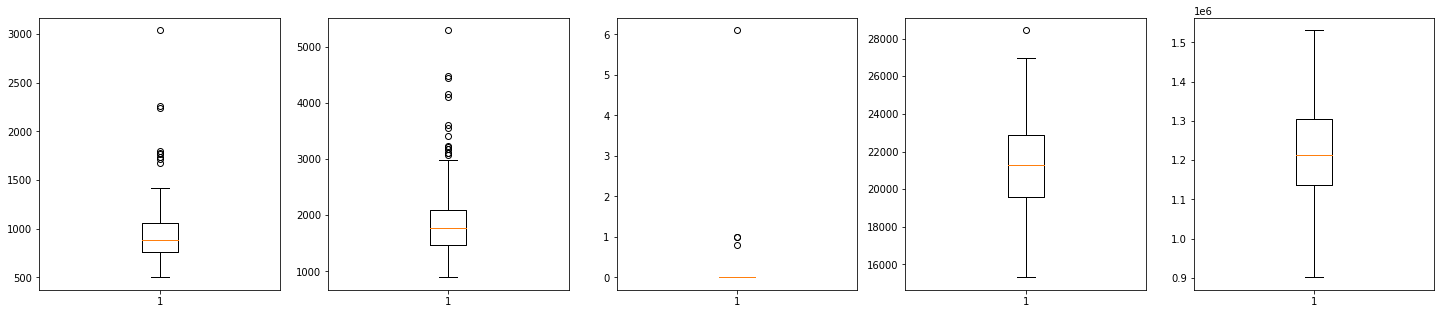

In [13]:
fig, (seg1, seg2, seg3, seg4, seg5) = plt.subplots(1, 5,figsize=(25,5))
seg1.boxplot(df_seg['3rd-Ventricle'])
seg2.boxplot(df_seg['4th-Ventricle'])
seg3.boxplot(df_seg['5th-Ventricle'])
seg4.boxplot(df_seg['Brain-Stem'])
seg5.boxplot(df_seg['BrainSegVol'])